In [1]:
import re, sys
import nilearn
from nilearn import plotting, input_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pieman_utils import *

from scipy.stats import zscore

/opt/anaconda3/envs/neuroimaging/lib/python3.9/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


In [2]:
fmri_data = np.load('../data_pieman/fmri_data_pieman.npy')
print(fmri_data.shape)


data = fmri_data.copy()
data = np.swapaxes(data, 0,1)
data = np.swapaxes(data, 1,2)
print(data.shape)



(68, 300, 293)
(300, 293, 68)


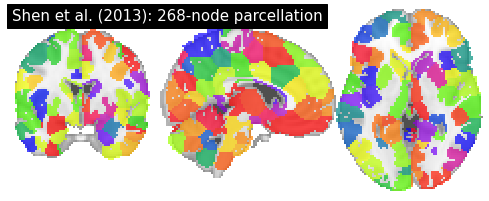

In [3]:
shen_file       = '../data_pieman/shen_2mm_268_parcellation.nii'
shen_masker = nilearn.input_data.NiftiLabelsMasker(labels_img=shen_file);
sample_file = '../data_pieman/func.nii'
shen_masker.fit_transform(sample_file);

nilearn.plotting.plot_roi(shen_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  title= 'Shen et al. (2013): 268-node parcellation',
                 );

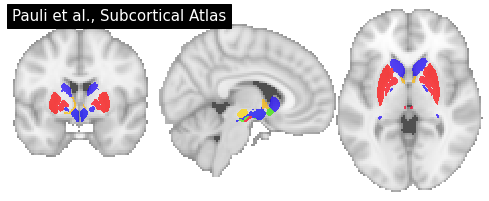

In [4]:
#Pauli
pauli_file       = '../data_pieman/pauli_2017_det.nii'
nilearn.plotting.plot_roi(pauli_file, 
                  annotate = False, 
                  cut_coords = (5,0,0),
                  cmap = 'prism',
                  draw_cross = False, 
                  title= 'Pauli et al., Subcortical Atlas',
                 );


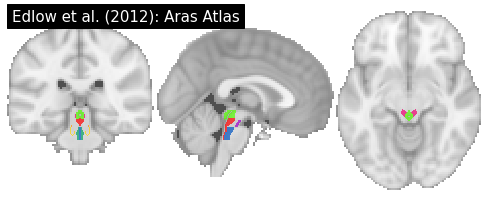

In [5]:
#AAN
aan_file       = '../data_pieman/aan_2012_det.nii'
nilearn.plotting.plot_roi(aan_file, 
                  annotate = False, 
                  cmap = 'prism',
                  draw_cross = False, 
                  title= 'Edlow et al. (2012): Aras Atlas',
                 );


In [6]:
s = '../data_pieman/shen_2mm_268_parcellation.nii'
simg = nilearn.image.load_img(s)
sdata = simg.get_data()
print(sdata.shape)

print(np.min(sdata))
print(np.max(sdata))

(91, 109, 91)
0.0
268.0


<ipython-input-6-b35117aafb5b>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  sdata = simg.get_data()


In [7]:
from nilearn.image import new_img_like

p = '../data_pieman/pauli_2017_det.nii'
pimg = nilearn.image.load_img(p)
pdata = pimg.get_data()
print(pdata.shape)

print(np.min(pdata))
print(np.max(pdata))

pdata = pdata+np.max(sdata)
pdata[np.where(pdata==np.max(sdata))] = 0

pauli_new_img = new_img_like(pimg, pdata)
pauli_new_img.to_filename('../data_pieman/pauli_increased.nii')

<ipython-input-7-8591042b8315>:5: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  pdata = pimg.get_data()


(198, 263, 212)
0.0
16.0


In [8]:
a = '../data_pieman/aan_2012_det.nii'
aimg = nilearn.image.load_img(a)
adata = aimg.get_data()
print(adata.shape)

print(np.min(adata))
print(np.max(adata))

adata = adata+np.max(pdata)
adata[np.where(adata==np.max(pdata))] = 0

aan_new_img = new_img_like(aimg, adata)
aan_new_img.to_filename('../data_pieman/aan_increased.nii')

<ipython-input-8-578783c24ba9>:3: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  adata = aimg.get_data()


(182, 218, 182)
0.0
9.0


In [9]:
from nilearn.image import resample_to_img


print(simg.get_fdata().shape)

resampled_A_to_S_img = resample_to_img(aimg, simg)
print(resampled_A_to_S_img.get_fdata().shape)

resampled_P_to_S_img = resample_to_img(pauli_new_img, simg)
print(resampled_P_to_S_img.get_fdata().shape)


(91, 109, 91)
(91, 109, 91)
(91, 109, 91)


In [12]:
resampled_A_to_S_img.to_filename('../data_pieman/atos.nii')

In [26]:
aandata   = resampled_A_to_S_img.get_fdata()
print(aandata.shape)

paulidata = resampled_P_to_S_img.get_fdata()
print(paulidata.shape)

shendata  = simg.get_fdata()
print(shendata.shape)


(91, 109, 91)
(91, 109, 91)
(91, 109, 91)


In [27]:
aandata[aandata<1] = 0
shendata[np.where(aandata>0)] = int(aandata[np.where(aandata>0)])

paulidata[paulidata<1] = 0
shendata[np.where(paulidata>0)] = int(paulidata[np.where(paulidata>0)])

all_new_img = new_img_like(simg, shendata)
all_new_img.to_filename('../data_pieman/allcombined.nii')

TypeError: only size-1 arrays can be converted to Python scalars